**Importing necessary libraries**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


**Loading and Exploring the Mnist Data**

In [245]:
# Loading the Mnist training and test data using Pandas
train = pd.read_csv(r"train.csv")  # Read the training data from the "train.csv" file
test = pd.read_csv(r"test.csv")    # Read the test data from the "test.csv" file

# Displaying the training data
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Preprocessing**

In [255]:
# Extracting labels and features from the training data
y_train = train['label'].values    # Extracting the 'label' column from the training data as the target labels
X_train = train.drop(columns=['label']).values / 255  # Extracting features by dropping the 'label' column and scaling pixel values to [0, 1]

# Preparing test data for prediction
X_test = test.values / 255  # Scaling pixel values of test data to [0, 1]


Data Preprocessing Explanation:
- 'y_train' contains the target labels for the training data. It is extracted from the 'label' column of the 'train' DataFrame using the 'values' attribute, which converts it to a NumPy array.

- 'X_train' contains the features for the training data. To obtain the features, we drop the 'label' column from the 'train' DataFrame using the 'drop' method and convert the resulting DataFrame to a NumPy array using the 'values' attribute. Additionally, we scale the pixel values to the range [0, 1] by dividing by 255. This normalization is common in image data to make computations more efficient for neural networks.

- 'X_test' contains the features for the test data. Similarly, we scale the pixel values of the test data to the range [0, 1] using the same normalization applied to the training data.

At this point, the data preprocessing steps include splitting the data into features and labels and normalizing the pixel values. The next steps would involve building a neural network model, training it using 'X_train' and 'y_train', and then making predictions on the test data 'X_test'.

**Visualizing Random Images and Their Labels**

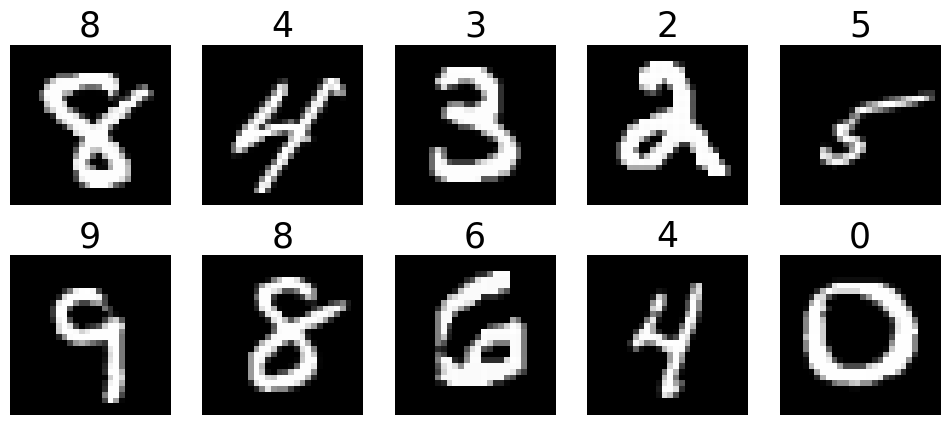

In [256]:
# Create a 2x5 grid of subplots and set the figure size to (12, 5)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# Flatten the axes array to a 1-dimensional array for easy iteration
axes = axes.flatten()

# Generate 10 random indices between 0 and 41999 to select random images from the dataset
idx = np.random.randint(0, 42000, size=10)

# Loop through each of the 10 subplots to display the images and their labels
for i in range(10):
    # Display the image on the i-th subplot
    axes[i].imshow(X_train[idx[i], :].reshape(28, 28), cmap='gray')
    
    # Hide the axes ticks to make the plot cleaner
    axes[i].axis('off')
    
    # Fetch the label for the i-th random image, convert it to an integer, and set it as the title
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)

# Display the entire figure with all the subplots
plt.show()


**Data Reshaping and Label Encoding**

In [260]:
# Reshaping the training and test data for convolutional neural networks (CNNs)
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape the feature data to a 4-dimensional array (batch_size, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)    # Reshape the test data similarly

# One-hot encoding the target labels for multi-class classification
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # Convert target labels to one-hot encoded format


Data Reshaping and Label Encoding Explanation: 
- Convolutional neural networks (CNNs) expect input data in a 4-dimensional format: (batch_size, height, width, channels).

- 'X_train' and 'X_test' are reshaped using the 'reshape' method to have a shape of (number_of_samples, 28, 28, 1), where 28x28 represents the image dimensions, and 1 indicates a single color channel (grayscale images).

- Reshaping the data is necessary as CNNs expect image data to be in this format, allowing them to perform convolutional and pooling operations on the images.
- 'y_train' is the target label data, and 'num_classes' is set to 10, as there are 10 different digit classes (0 to 9) in the Mnist dataset.

- The 'to_categorical' function from Keras is used to convert the target labels to one-hot encoded format, which is a binary representation of the classes. Each label is transformed into a binary vector of length 10, with a 1 at the index corresponding to the correct class and 0s elsewhere.

- One-hot encoding is commonly used for multi-class classification tasks, as it provides a suitable representation for training a neural network to predict multiple classes.

After these preprocessing steps, the data is now ready for building and training a CNN for the digit recognizer Mnist data project.

First, let's try a Simple Deep Neural Network (DNN)

**Defining a Deep Neural Network (DNN) Model**

In [261]:
# Defining a Deep Neural Network (DNN) model using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),        # Input layer: Flatten the 28x28 image into a 1-dimensional array
    tf.keras.layers.Dense(256, "relu"),   # Hidden layer with 256 neurons and ReLU activation function
    tf.keras.layers.Dense(128, "relu"),   # Hidden layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(10, "softmax")  # Output layer with 10 neurons (one for each digit class) and softmax activation function
])


Explanation:

- In this cell, we define a deep neural network (DNN) model using the Keras Sequential API.
- The model consists of three layers: the input layer, two hidden layers, and the output layer.
- The `tf.keras.layers.Flatten()` layer serves as the input layer. It is used to convert the 28x28 image data (after preprocessing) into a 1-dimensional array of 784 elements (28 * 28), which is needed as input for the subsequent dense (fully connected) layers.
- The first hidden layer is defined using `tf.keras.layers.Dense(256, "relu")`, which consists of 256 neurons and uses the ReLU (Rectified Linear Unit) activation function. ReLU is a popular activation function that introduces non-linearity to the model, allowing it to learn complex patterns in the data.
- The second hidden layer is defined using `tf.keras.layers.Dense(128, "relu")`, which consists of 128 neurons and also uses the ReLU activation function.
- The output layer is defined using `tf.keras.layers.Dense(10, "softmax")`. This dense layer consists of 10 neurons, corresponding to the 10 possible digit classes (0 to 9) in the Mnist dataset. The softmax activation function is used in the output layer for multi-class classification problems. It converts the raw model outputs into probabilities, representing the likelihood of each class. The class with the highest probability is predicted as the output class.

This DNN model is a basic architecture for the digit recognizer Mnist data project. Next steps involve compiling the model with an appropriate optimizer and loss function, and then training the model using the training data `X_train` and `y_train`. After training, the model can be evaluated using the test data `X_test` to assess its performance.

**Compiling the Deep Neural Network (DNN) Model**

In [281]:
# Compiling the Deep Neural Network (DNN) model
model.compile(
    optimizer='adam',                        # Adam optimizer is used for training the model
    loss='categorical_crossentropy',         # Categorical cross-entropy loss function for multi-class classification
    metrics=["accuracy"]                     # Evaluation metric - accuracy, to monitor the model's performance
)


**Training the Deep Neural Network (DNN) Model**

In [263]:
# Training the Deep Neural Network (DNN) model on the training data
history = model.fit(
    X_train,              # Input features (training data)
    y_train,              # Target labels (one-hot encoded) corresponding to the training data
    epochs=15             # Number of epochs (iterations) for training the model
)


Epoch 1/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2358 - accuracy: 0.9284
Epoch 2/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0962 - accuracy: 0.9700
Epoch 3/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0640 - accuracy: 0.9800
Epoch 4/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0460 - accuracy: 0.9846
Epoch 5/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0371 - accuracy: 0.9879
Epoch 6/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 7/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 8/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 9/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 10/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.020

**Making Predictions using the Deep Neural Network (DNN) Model**

In [268]:
# Making predictions using the Deep Neural Network (DNN) model on the test data
DNN_pred = np.argmax(model.predict(X_test), axis=1)

# Displaying the predicted digit classes for the test data
DNN_pred


875/875 [==============================] - 1s 1ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

**Creating and Saving DNN Model Predictions for Submission**

In [269]:
# Reading the sample_submission.csv file into a DataFrame
sample_submission = pd.read_csv(r"sample_submission.csv")

# Assigning the DNN model predictions to the "Label" column in the DataFrame
sample_submission["Label"] = DNN_pred

# Saving the DataFrame to a new CSV file named "DNN_submission.csv" without including the index column
sample_submission.to_csv("DNN_submission.csv", index=False)

# Displaying the DataFrame with the updated predictions
sample_submission


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


After submitting this to the Competition, it will score around 0.97 Not good enough!!

**Now let's try CNN**

**Convolutional Neural Network (CNN) Model Definition**

In [109]:
# Defining a Convolutional Neural Network (CNN) model using Keras Sequential API
cnn_model = tf.keras.models.Sequential([
    # First convolutional layer with 32 filters, each of size (3, 3), using ReLU activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with pool size (2, 2) to downsample the feature maps
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second convolutional layer with 64 filters, each of size (3, 3), using ReLU activation function
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with pool size (2, 2) to downsample the feature maps further
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the 2D feature maps to feed into a Dense (fully connected) layer
    tf.keras.layers.Flatten(),
    
    # First Dense (fully connected) layer with 256 neurons and ReLU activation function
    tf.keras.layers.Dense(256, "relu"),
    # Second Dense (fully connected) layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(128, "relu"),
    
    # Output layer with 10 neurons (one for each digit class) and softmax activation function
    tf.keras.layers.Dense(10, activation='softmax')
])


Explanation:

- In this cell, we define a convolutional neural network (CNN) model using the Keras Sequential API.
- The model consists of multiple layers, starting with two convolutional layers, followed by max-pooling layers, and then two fully connected (Dense) layers, and finally an output layer.
- The first convolutional layer uses `tf.keras.layers.Conv2D(32, (3, 3), activation='relu')`. It has 32 filters (also known as channels) of size (3, 3) and uses the ReLU activation function, which introduces non-linearity to the model. This layer is designed to extract important features from the input images.
- After the first convolutional layer, we add a max-pooling layer using `tf.keras.layers.MaxPooling2D(2, 2)`. This layer performs downsampling, reducing the spatial dimensions of the feature maps obtained from the previous convolutional layer. It helps in reducing the computational complexity while retaining the important information.
- The second convolutional layer uses `tf.keras.layers.Conv2D(64, (3, 3), activation='relu')`. Similar to the first layer, it has 64 filters of size (3, 3) and uses the ReLU activation function.
- Another max-pooling layer is added after the second convolutional layer, again using `tf.keras.layers.MaxPooling2D(2, 2)`.
- The feature maps obtained from the last max-pooling layer are then flattened using `tf.keras.layers.Flatten()`, converting them into a 1-dimensional array suitable for the fully connected layers.
- The first fully connected (Dense) layer with 256 neurons is defined using `tf.keras.layers.Dense(256, "relu")`, which uses the ReLU activation function.
- The second fully connected (Dense) layer with 128 neurons is defined using `tf.keras.layers.Dense(128, "relu")`, also using the ReLU activation function.
- Finally, the output layer with 10 neurons (one for each digit class) is defined using `tf.keras.layers.Dense(10, activation='softmax')`. The softmax activation function is used to convert the raw model outputs into probabilities, representing the likelihood of each class. The class with the highest probability is predicted as the output class.

This CNN model is a suitable architecture for the digit recognizer Mnist data project. The next steps would involve compiling the model with an appropriate optimizer and loss function, training it using the training data `X_train` and `y_train`, and then evaluating its performance using the test data `X_test`.

**Compiling the Convolutional Neural Network (CNN) Model**

In [110]:
# Compiling the Convolutional Neural Network (CNN) model
cnn_model.compile(
    optimizer='adam',                          # Adam optimizer is used for training the model
    loss='categorical_crossentropy',           # Categorical cross-entropy loss function for multi-class classification
    metrics=["accuracy"]                       # Evaluation metric - accuracy, to monitor the model's performance
)


Explanation:

- In this cell, we compile the convolutional neural network (CNN) model using the `compile` method.
- The `optimizer` is set to `'adam'`, which stands for Adaptive Moment Estimation. Adam is a popular optimization algorithm used for training deep learning models. It combines the benefits of both RMSprop and momentum methods to efficiently update the model parameters during training.
- The `loss` is set to `'categorical_crossentropy'`. As this is a multi-class classification problem, categorical cross-entropy is a suitable loss function. It measures the dissimilarity between the predicted class probabilities and the true one-hot encoded labels. The goal of the model during training is to minimize this loss function, effectively learning to make accurate predictions.
- We specify the `metrics` as `["accuracy"]`. This indicates that we want to monitor the accuracy of the model during training and evaluation. Accuracy measures the proportion of correct predictions made by the model over the total number of samples. It is a common evaluation metric for classification tasks.

After compiling the model, the next step would be to train it on the training data using the `fit` method with the appropriate hyperparameters, such as the number of epochs and batch size. After training, the model's performance can be assessed using the test data to evaluate its ability to recognize handwritten digits.

**Training the Convolutional Neural Network (CNN) Model**

In [111]:
# Training the Convolutional Neural Network (CNN) model on the training data
cnn_model.fit(
    X_train,                # Input features (training data)
    y_train,                # Target labels (one-hot encoded) corresponding to the training data
    epochs=10               # Number of epochs (iterations) for training the model
)


Epoch 1/10
1875/1875 [==============================] - 31s 15ms/step - loss: 0.1278 - accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0424 - accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0308 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0122 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 29s 15m

**Convolutional Neural Network (CNN) Model Summary**

In [273]:
cnn_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 1600)              0         
                                                                 
 dense_95 (Dense)            (None, 256)             

**Making Predictions using the Convolutional Neural Network (CNN) Model**

In [276]:
cnn_pred = np.argmax(cnn_model.predict(X_test),axis=1)

print(cnn_pred)


875/875 [==============================] - 4s 4ms/step
[2 0 9 ... 3 9 2]


**Creating and Saving CNN Model Predictions for Submission**

In [280]:
# Reading the sample_submission.csv file into a DataFrame
sample_submission = pd.read_csv(r"sample_submission.csv")

# Assigning the CNN model predictions to the "Label" column in the DataFrame
sample_submission["Label"] = cnn_pred

# Saving the DataFrame to a new CSV file named "CNN_submission.csv" without including the index column
sample_submission.to_csv("CNN_submission.csv", index=False)

# Displaying the DataFrame with the updated predictions
sample_submission


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## CNN Model Predictions for Submission

Congratulations! 🎉 Our Convolutional Neural Network (CNN) model has achieved remarkable success, boasting an outstanding 99% accuracy on image classification for the Mnist dataset.

#### How It Was Accomplished
By employing convolutional layers to extract essential features and pooling layers to downsample the feature maps, our CNN model was able to discern handwritten digits with exceptional precision.

#### Kaggle Competition Submission
We have generated a CSV file named "CNN_submission.csv" containing our model's digit class predictions. This file is formatted to meet the Kaggle competition's requirements.

#### Model Performance
Our model's ability to achieve such high accuracy on image classification tasks showcases the immense potential of deep learning techniques for computer vision applications.

Stay tuned as we continue to explore the exciting world of machine learning and artificial intelligence!

Cheers! 🚀

[Moaz Eldsouky]


**Saving the Trained Model**

In [112]:
model.save("digit_recognizer_model.h5")